In [1]:
import contextily as cx
import geopandas as gpd

Load a shapefile of california census tracts as a GeoDataFrame:

In [2]:
gdf = gpd.read_file('./tl_2019_06_tract/')
gdf.shape  # output GeoDataFrame count of rows, columns

(8057, 13)

Filter the GeoDataFrame to retain only tracts in Southern California counties:

In [3]:
socal = ['025', '029', '037', '059', '065', '071', '073', '079', '083', '111']
gdf = gdf[gdf['COUNTYFP'].isin(socal)]
gdf.shape

(4879, 13)

Dissolve the tracts into counties, summing numerical field, then project the counties to the CRS of the California State Plane Coordinate System zone 5:

In [4]:
counties = gdf.dissolve(by='COUNTYFP', aggfunc='sum')
counties = counties.to_crs('EPSG:3497')

Plot a choropleth map of the data, with counties colored by land area (km²):

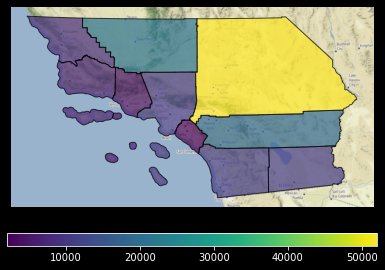

In [5]:
counties['ALAND'] = counties['ALAND'] / 1e6 # convert m^2 to km^2
ax = counties.plot(column='ALAND', cmap='viridis', edgecolor='k', alpha=0.7, legend=True)
cx.add_basemap(ax, crs=counties.crs.to_string()) # add basemap with contextily
_ = ax.axis('off')